In [31]:
# pip install tslearn

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans

C:\ProgramData\Anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


Load Data

In [34]:
df = pd.read_csv('ts_example.csv', index_col=0)
df.head()

,t0,t1,t2,t3,t4,t5,t6
idx,,,,,,,
0,12,27,30,48,59,60,76
1,11,30,31,44,58,66,70
2,16,25,36,50,59,68,76
3,19,26,38,47,56,64,73
4,18,22,30,43,58,61,72


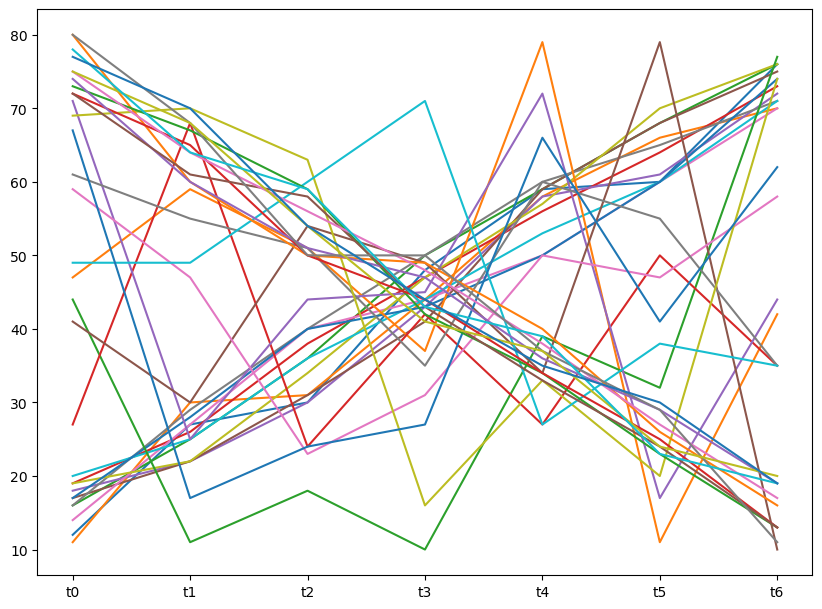

In [35]:
plt.plot(df.T)
plt.show()

Preprocessing

In [36]:

avg_list = []
std_list = []

for idx, row in df.iterrows():
    avg_list.append(row.mean())
    std_list.append(row.std())

In [37]:
df['avg'] = avg_list
df['std'] = std_list
df.head()

,t0,t1,t2,t3,t4,t5,t6,avg,std
idx,,,,,,,,,
0,12,27,30,48,59,60,76,44.571429,22.463727
1,11,30,31,44,58,66,70,44.285714,21.638810
2,16,25,36,50,59,68,76,47.142857,22.363874
3,19,26,38,47,56,64,73,46.142857,19.777332
4,18,22,30,43,58,61,72,43.428571,20.911378


In [38]:
for i in range(len(df)):
    for j in range(0, 7):
        df.iloc[i, j] = (df.iloc[i, j] - df.iloc[i, 7]) / df.iloc[i, 8]
df.head()

,t0,t1,t2,t3,t4,t5,t6,avg,std
idx,,,,,,,,,
0,-1.449957,-0.782213,-0.648665,0.152627,0.642305,0.686822,1.399081,44.571429,22.463727
1,-1.538241,-0.660189,-0.613976,-0.013204,0.633782,1.003488,1.188341,44.285714,21.638810
2,-1.392552,-0.990117,-0.498253,0.127757,0.530192,0.932627,1.290346,47.142857,22.363874
3,-1.372423,-1.018482,-0.411727,0.043340,0.498406,0.902910,1.357976,46.142857,19.777332
4,-1.216016,-1.024733,-0.642166,-0.020495,0.696818,0.840281,1.366310,43.428571,20.911378


In [39]:
df = df.drop(['avg', 'std'], axis=1)
df.head()

,t0,t1,t2,t3,t4,t5,t6
idx,,,,,,,
0,-1.449957,-0.782213,-0.648665,0.152627,0.642305,0.686822,1.399081
1,-1.538241,-0.660189,-0.613976,-0.013204,0.633782,1.003488,1.188341
2,-1.392552,-0.990117,-0.498253,0.127757,0.530192,0.932627,1.290346
3,-1.372423,-1.018482,-0.411727,0.043340,0.498406,0.902910,1.357976
4,-1.216016,-1.024733,-0.642166,-0.020495,0.696818,0.840281,1.366310


Model1: Euclidean

In [40]:
model = TimeSeriesKMeans(n_clusters=3, metric='euclidean', random_state=121)

In [41]:
result = model.fit_predict(df)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [42]:
df['clst'] = result
df.head()

,t0,t1,t2,t3,t4,t5,t6,clst
idx,,,,,,,,
0,-1.449957,-0.782213,-0.648665,0.152627,0.642305,0.686822,1.399081,0
1,-1.538241,-0.660189,-0.613976,-0.013204,0.633782,1.003488,1.188341,0
2,-1.392552,-0.990117,-0.498253,0.127757,0.530192,0.932627,1.290346,0
3,-1.372423,-1.018482,-0.411727,0.043340,0.498406,0.902910,1.357976,0
4,-1.216016,-1.024733,-0.642166,-0.020495,0.696818,0.840281,1.366310,0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


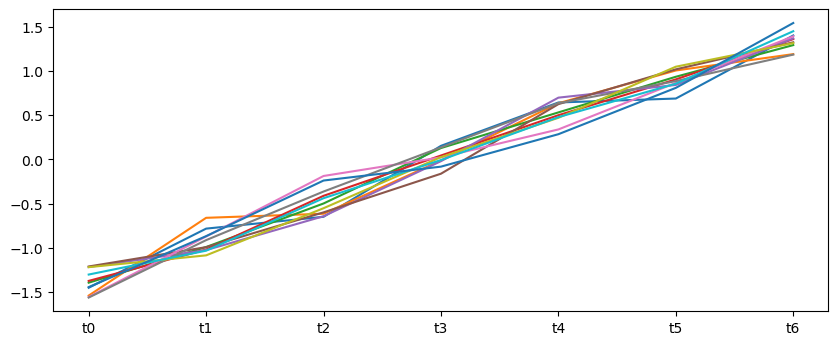

In [43]:
clst0 = df[df['clst']==0]
clst0.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst0.T)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


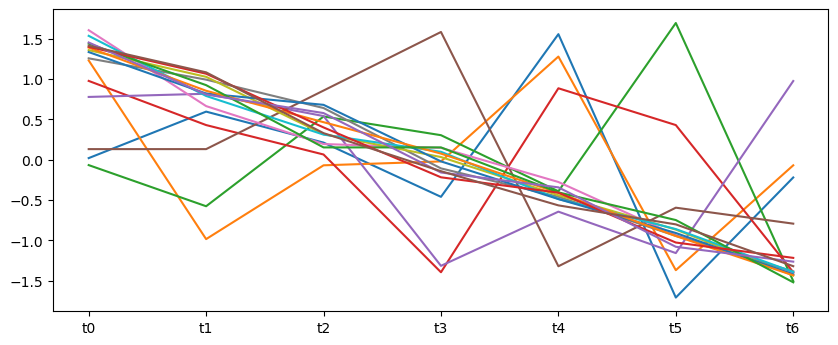

In [44]:
clst1 = df[df['clst']==1]
clst1.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst1.T)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


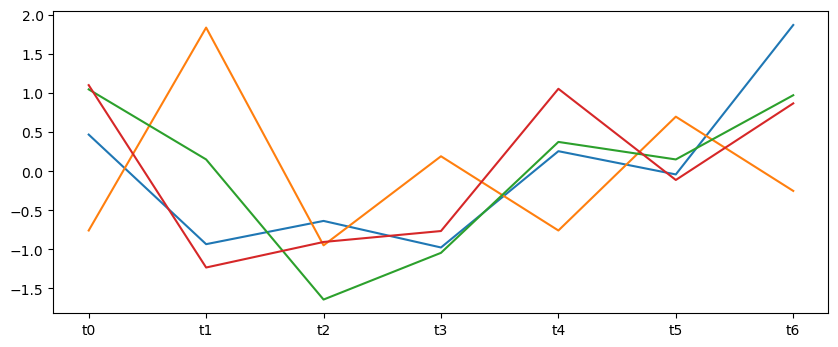

In [45]:
clst2 = df[df['clst']==2]
clst2.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst2.T)
plt.show()

Model2: DTW

In [46]:
model2 = TimeSeriesKMeans(n_clusters=3, metric='dtw', random_state=121)

In [47]:
result2 = model2.fit_predict(df)
result2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [48]:
df['clst'] = result2
df.head()

,t0,t1,t2,t3,t4,t5,t6,clst
idx,,,,,,,,
0,-1.449957,-0.782213,-0.648665,0.152627,0.642305,0.686822,1.399081,0
1,-1.538241,-0.660189,-0.613976,-0.013204,0.633782,1.003488,1.188341,0
2,-1.392552,-0.990117,-0.498253,0.127757,0.530192,0.932627,1.290346,0
3,-1.372423,-1.018482,-0.411727,0.043340,0.498406,0.902910,1.357976,0
4,-1.216016,-1.024733,-0.642166,-0.020495,0.696818,0.840281,1.366310,0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


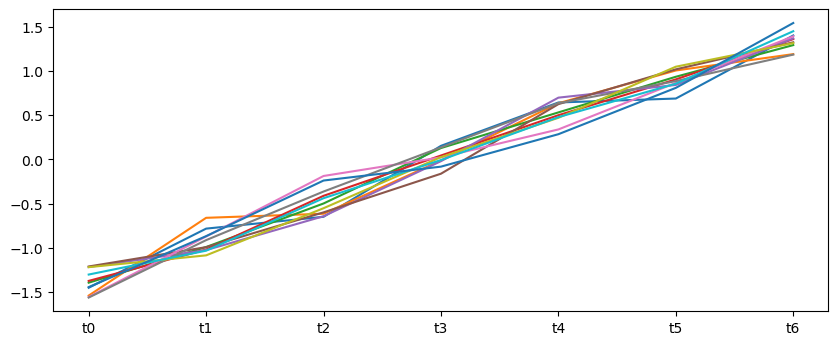

In [49]:
clst0 = df[df['clst']==0]
clst0.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst0.T)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


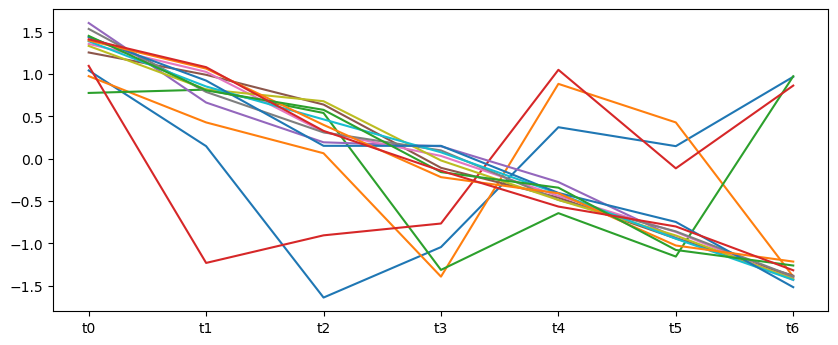

In [50]:
clst1 = df[df['clst']==1]
clst1.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst1.T)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


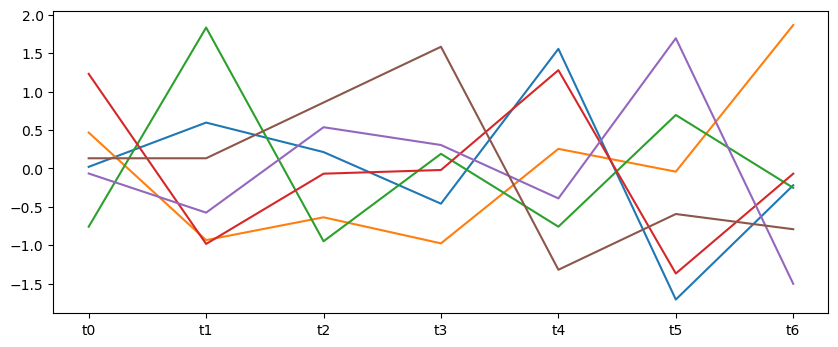

In [51]:
clst2 = df[df['clst']==2]
clst2.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst2.T)
plt.show()